In [50]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import OrdinalEncoder 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
#See orginal dataframe
df = pd.read_csv("/Users/jordankavishe/Desktop/semester5/data1030/midterm/support2.csv")
df.shape

(9105, 47)

In [3]:
df.dtypes.where(lambda x: x == 'object').dropna()

sex        object
dzgroup    object
dzclass    object
income     object
race       object
ca         object
dnr        object
sfdm2      object
dtype: object

In [4]:
df.dtypes

age         float64
death         int64
sex          object
hospdead      int64
slos          int64
d.time        int64
dzgroup      object
dzclass      object
num.co        int64
edu         float64
income       object
scoma       float64
charges     float64
totcst      float64
totmcst     float64
avtisst     float64
race         object
sps         float64
aps         float64
surv2m      float64
surv6m      float64
hday          int64
diabetes      int64
dementia      int64
ca           object
prg2m       float64
prg6m       float64
dnr          object
dnrday      float64
meanbp      float64
wblc        float64
hrt         float64
resp        float64
temp        float64
pafi        float64
alb         float64
bili        float64
crea        float64
sod         float64
ph          float64
glucose     float64
bun         float64
urine       float64
adlp        float64
adls        float64
sfdm2        object
adlsc       float64
dtype: object

# Deal with missing values where the feature has less than 100 instances of missing values

In [5]:
def find_nulls(dataframe : pd.DataFrame, n : int):
    '''Function that gives you all the features that have more than n missing instances'''
    null_series = dataframe.isnull().sum().where(lambda x: x > n).dropna()
    return null_series

In [6]:
def find_null_ints(dataframe : pd.DataFrame, n : int):
    '''Function that gives you all the features that have exactly n missing instances'''
    null_series_int = dataframe.isnull().sum().where(lambda x: x == n).dropna()
    null_series_int_list = null_series_int.index.to_list()
    return null_series_int, null_series_int_list

In [7]:
extreme_null_df = df.dropna()
extreme_null_df.shape # Dataframe if you dropped ALL missing values

(306, 47)

In [8]:
null_df = df[df.isnull().any(axis=1)]
print(f"Percentage of rows with at least one missing value: {null_df.shape[0] / df.shape[0]}")

Percentage of rows with at least one missing value: 0.9663920922570016


In [9]:
null_features = find_nulls(df, 0).index.to_list()
print(f"There are {len(null_features)} features with at least one missing values. \n These features are: {null_features}")


There are 33 features with at least one missing values. 
 These features are: ['edu', 'income', 'scoma', 'charges', 'totcst', 'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'prg2m', 'prg6m', 'dnr', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls', 'sfdm2']


In [10]:
# Percentage of each feature that are missing
missing_feature_percentages = {}
for n in null_features:
    null_percent = null_df[null_df[n].isnull()].shape[0] / df.shape[0]
    missing_feature_percentages[n] =  null_percent
    print(f"Percetage of {n} features missing: {null_percent}")

Percetage of edu features missing: 0.17946183415705655
Percetage of income features missing: 0.3275123558484349
Percetage of scoma features missing: 0.00010982976386600769
Percetage of charges features missing: 0.018890719384953323
Percetage of totcst features missing: 0.09752883031301483
Percetage of totmcst features missing: 0.3816584294343767
Percetage of avtisst features missing: 0.00900604063701263
Percetage of race features missing: 0.004612850082372323
Percetage of sps features missing: 0.00010982976386600769
Percetage of aps features missing: 0.00010982976386600769
Percetage of surv2m features missing: 0.00010982976386600769
Percetage of surv6m features missing: 0.00010982976386600769
Percetage of prg2m features missing: 0.18110928061504666
Percetage of prg6m features missing: 0.17935200439319054
Percetage of dnr features missing: 0.0032948929159802307
Percetage of dnrday features missing: 0.0032948929159802307
Percetage of meanbp features missing: 0.00010982976386600769
Percet

In [11]:
# Dataframe for percentage of each feature missing
missing_value_percents = pd.DataFrame(missing_feature_percentages,  index=[0])
missing_value_percents = missing_value_percents.melt(var_name='Feauture', value_name='Percent of missing values')

In [12]:
# Drop all the features with only one missing values
null_ones = df.isnull().sum().where(lambda x: x == 1).dropna().index.to_list()
df.dropna(subset=null_ones, inplace=True)
df.shape

(9103, 47)

In [13]:
# Drop all the features with less than 100 missing values
null_greater_than_one = find_nulls(df, 0).where(lambda x: x < 100).dropna().index.to_list()
df.dropna(subset=null_greater_than_one, inplace=True)
df.shape

(8888, 47)

In [14]:
find_nulls(df, 100)

edu        1572.0
income     2890.0
charges     146.0
totcst      846.0
totmcst    3402.0
prg2m      1599.0
prg6m      1584.0
wblc        165.0
pafi       2227.0
alb        3254.0
bili       2493.0
ph         2186.0
glucose    4400.0
bun        4250.0
urine      4774.0
adlp       5495.0
adls       2747.0
sfdm2      1355.0
dtype: float64

In [15]:
df['prg2m'].describe()

count    7289.000000
mean        0.618315
std         0.297745
min         0.000000
25%         0.500000
50%         0.700000
75%         0.900000
max         1.000000
Name: prg2m, dtype: float64

In [16]:
df['prg6m'].describe()

count    7304.000000
mean        0.499737
std         0.303993
min         0.000000
25%         0.200000
50%         0.500000
75%         0.750000
max         1.000000
Name: prg6m, dtype: float64

In [17]:
values = {'alb': 3.5, 'pafi' : 333.3, 'bili' : 1.01, 'crea' : 1.01, 'bun' : 6.51, 'wblc' : 9, 'urine' : 2502, 'ph' : 7.415534, 
          'glucose' : 159.640000, 'adlp' : 1.162239, 'adls' : 1.621342, 'totcst' : 30241.998476, 'prg2m' : 0.700000, 'prg6m' :0.500000}
df.fillna(value=values, inplace=True)

In [18]:
find_nulls(df, 100)

edu        1572.0
income     2890.0
charges     146.0
totmcst    3402.0
sfdm2      1355.0
dtype: float64

In [19]:
df['income'].value_counts()

income
under $11k    2798
$11-$25k      1494
$25-$50k      1036
>$50k          670
Name: count, dtype: int64

In [20]:
df.dropna(subset=['edu', 'charges', 'sfdm2'], inplace=True)

In [21]:
df.shape

(6421, 47)

In [22]:
find_nulls(df, 100)

income     1372.0
totmcst    2282.0
dtype: float64

In [46]:
df_missing_impute = df[['income', 'totmcst']]

In [47]:
df_missing_impute.dtypes

income      object
totmcst    float64
dtype: object

In [48]:
df_missing_impute

,income,totmcst
3,under $11k,NaN
4,under $11k,NaN
6,NaN,NaN
7,$25-$50k,NaN
11,NaN,NaN
...,...,...
9097,$11-$25k,11979.56250
9099,NaN,55285.37500
9100,under $11k,1976.73926
9104,NaN,NaN


In [49]:
from scipy import stats as ss

y = df['prg6m']
X = df.drop(columns=['income', 'totmcst', 'prg2m', 'prg6m'])


In [51]:
df['income']

3       under $11k
4       under $11k
6              NaN
7         $25-$50k
11             NaN
           ...    
9097      $11-$25k
9099           NaN
9100    under $11k
9104           NaN
9105      $11-$25k
Name: income, Length: 6421, dtype: object

In [53]:
df.to_csv('/Users/jordankavishe/Desktop/semester5/data1030/midterm/income_impute_support2')

In [27]:
from sklearn.impute import KNNImputer
import pandas as pd

# Assume 'data' is your DataFrame
# Replace 'relevant_features' with the columns you want to use for imputation
imputer = KNNImputer(n_neighbors=5)
df['prg6m_imputed'] = imputer.fit_transform(X.columns)

# Now 'prg6m_imputed' contains the original values along with imputed values for missing entries


ValueError: could not convert string to float: 'age'

# EDA

In [28]:
# Total hospital deaths by race
for r in df["race"].unique():
    death_count = df[(df["race"] == r) & (df["hospdead"] == 1)].shape[0]
    print(f"{r} total deaths: {death_count}")


white total deaths: 1310
hispanic total deaths: 60
other total deaths: 16
asian total deaths: 19
black total deaths: 255


In [29]:
# Total death rate by race
for r in df["race"].unique():
    death_count = df[(df["race"] == r) & (df["hospdead"] == 1)].shape[0]
    total_amount = df[df["race"] == r].shape[0]
    death_rate = death_count / total_amount 
    print(f"{r} death rate: {death_rate}")

white death rate: 0.254319549602019
hispanic death rate: 0.2643171806167401
other death rate: 0.2807017543859649
asian death rate: 0.3877551020408163
black death rate: 0.272145144076841


<BarContainer object of 5 artists>

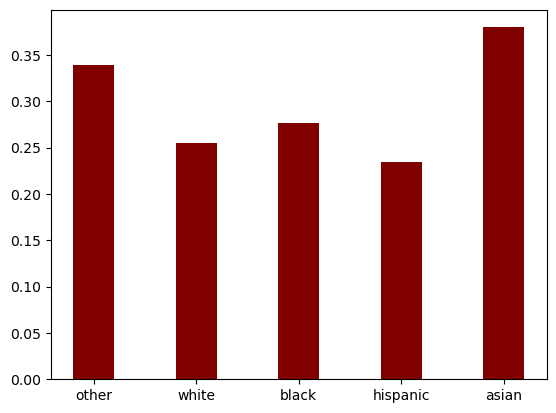

In [30]:
# Bar graph showing total death rate by race

data = {
    'other': 0.3394495412844037, 
    'white': 0.2552889393724265,
    'black': 0.2765179224579371,
    'hispanic': 0.23448275862068965,
    'asian': 0.379746835443038
}

hospdead_percents = pd.DataFrame(list(data.items()), columns=['Race', 'Percent'])

data

races = data.keys()
hospdead_rate = data.values()
plt.bar(races, hospdead_rate, color ='maroon', 
        width = 0.4)

In [31]:
# Overall death rate broken down by race

overall_death = {}
for r in df["race"].unique():
    death_count = df[(df["race"] == r) & (df["hospdead"] == 1)].shape[0]
    total_amount = df[df['hospdead'] == 1].shape[0]
    death_rate = death_count / total_amount 
    overall_death[r] = death_rate
    print(f"{r} death rate: {death_rate}")

overall_death

white death rate: 0.7891566265060241
hispanic death rate: 0.03614457831325301
other death rate: 0.00963855421686747
asian death rate: 0.01144578313253012
black death rate: 0.1536144578313253


{'white': 0.7891566265060241,
 'hispanic': 0.03614457831325301,
 'other': 0.00963855421686747,
 'asian': 0.01144578313253012,
 'black': 0.1536144578313253}

In [32]:
df['dzgroup'].unique()

array(['Cirrhosis', 'Lung Cancer', 'Coma', 'CHF', 'ARF/MOSF w/Sepsis',
       'Colon Cancer', 'MOSF w/Malig', 'COPD'], dtype=object)

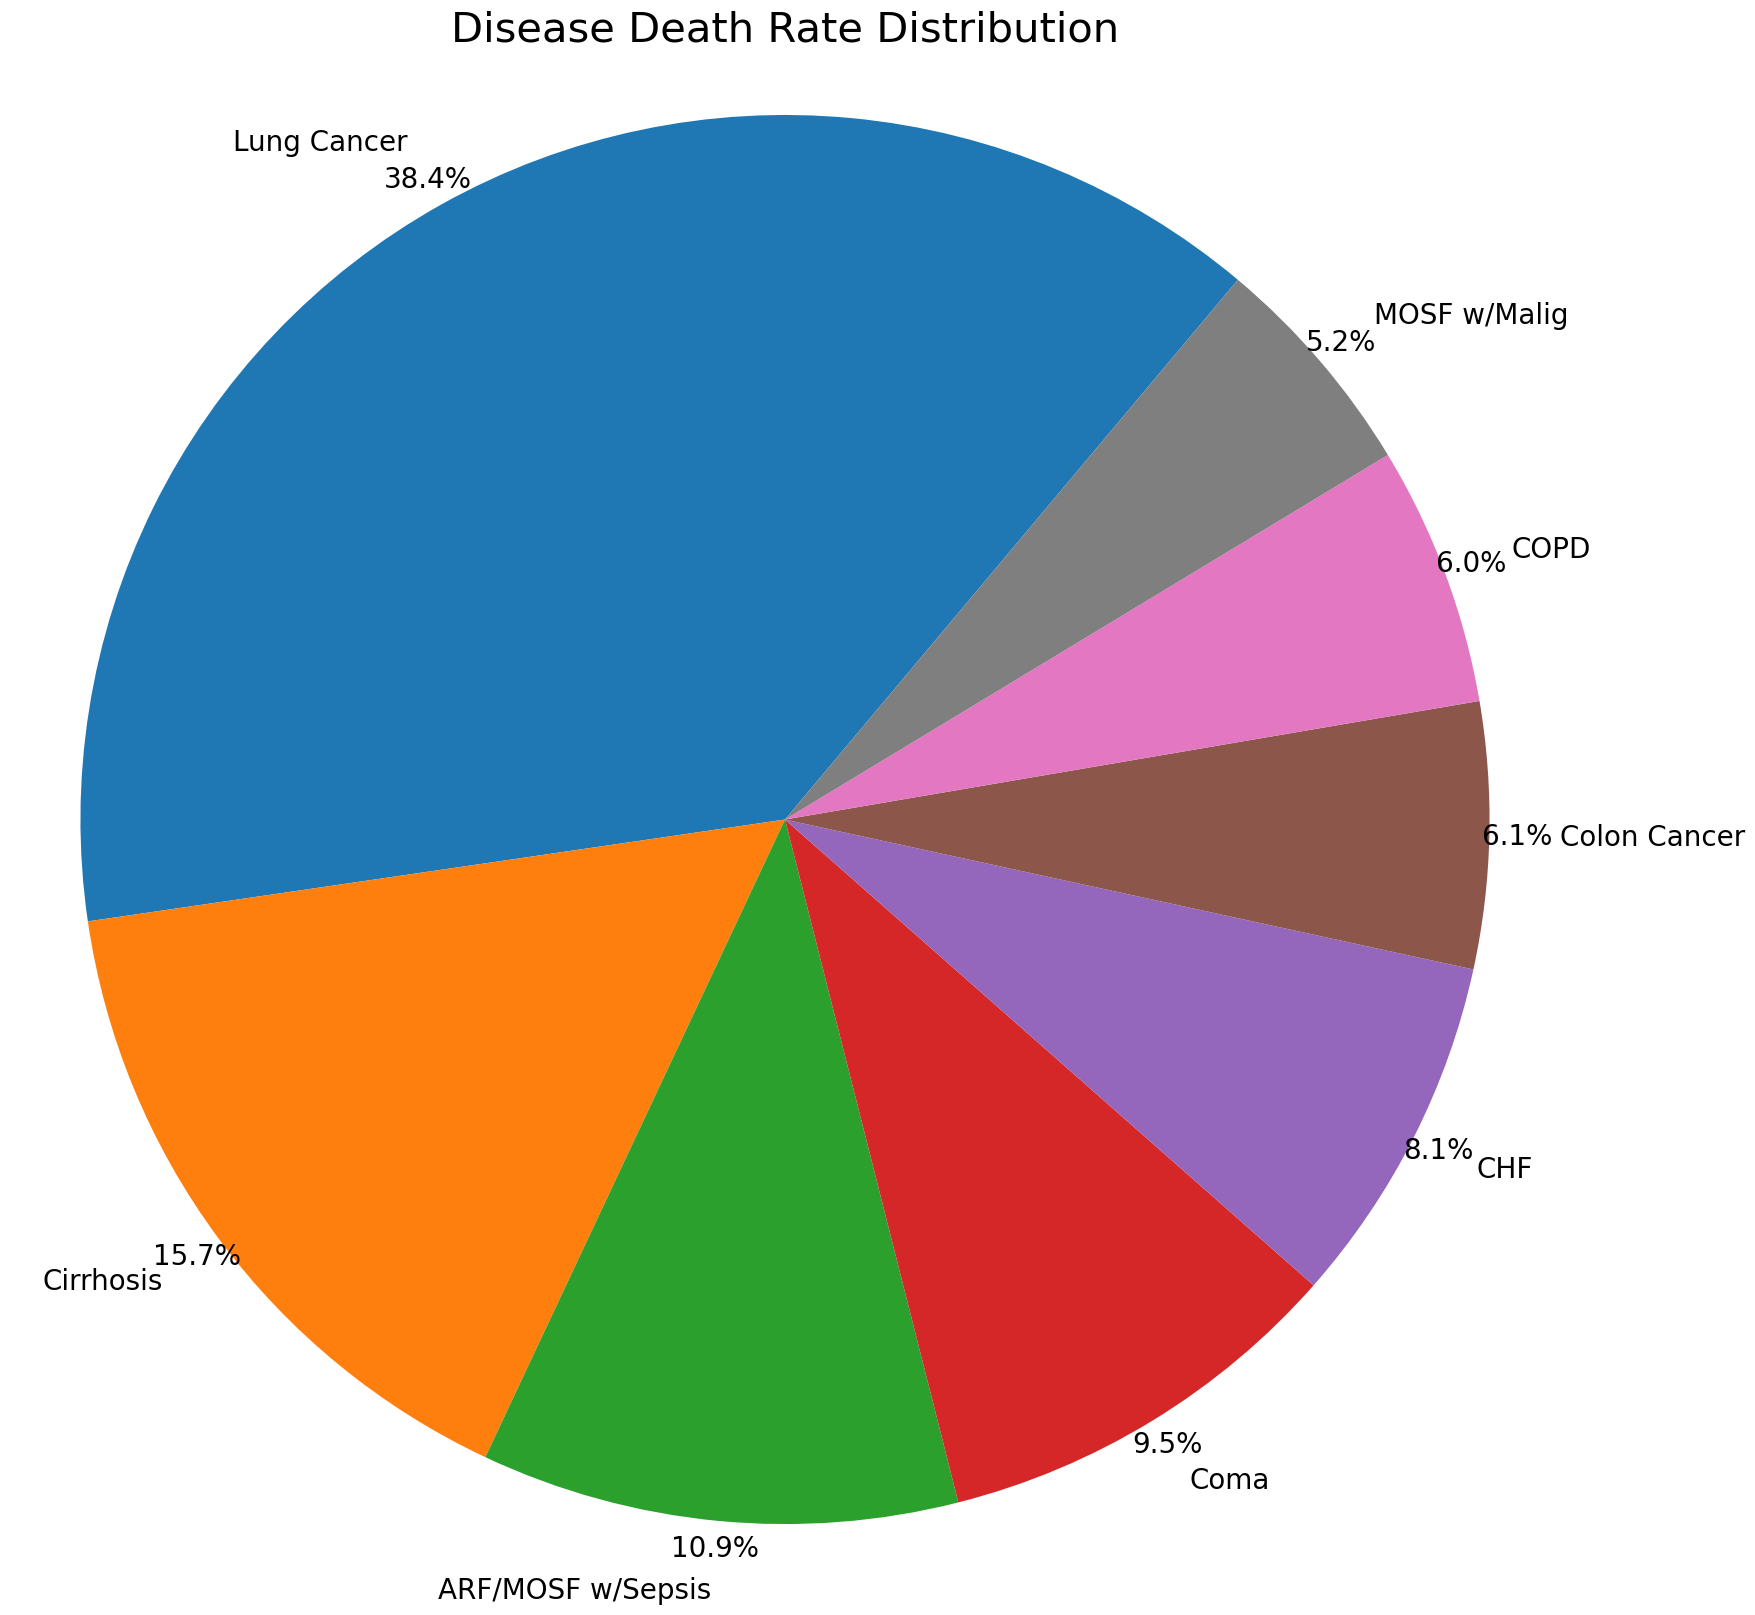

In [33]:
plt.figure(figsize=(20, 20))
plt.pie(df['dzgroup'].value_counts(), labels=['Lung Cancer', 'Cirrhosis', 'ARF/MOSF w/Sepsis', 'Coma', 'CHF',
       'Colon Cancer', 'COPD', 'MOSF w/Malig'], autopct='%1.1f%%', startangle=50, pctdistance=1.04, textprops={'fontsize': 20})
plt.title('Disease Death Rate Distribution', fontsize=30)
plt.axis('equal')
plt.show()

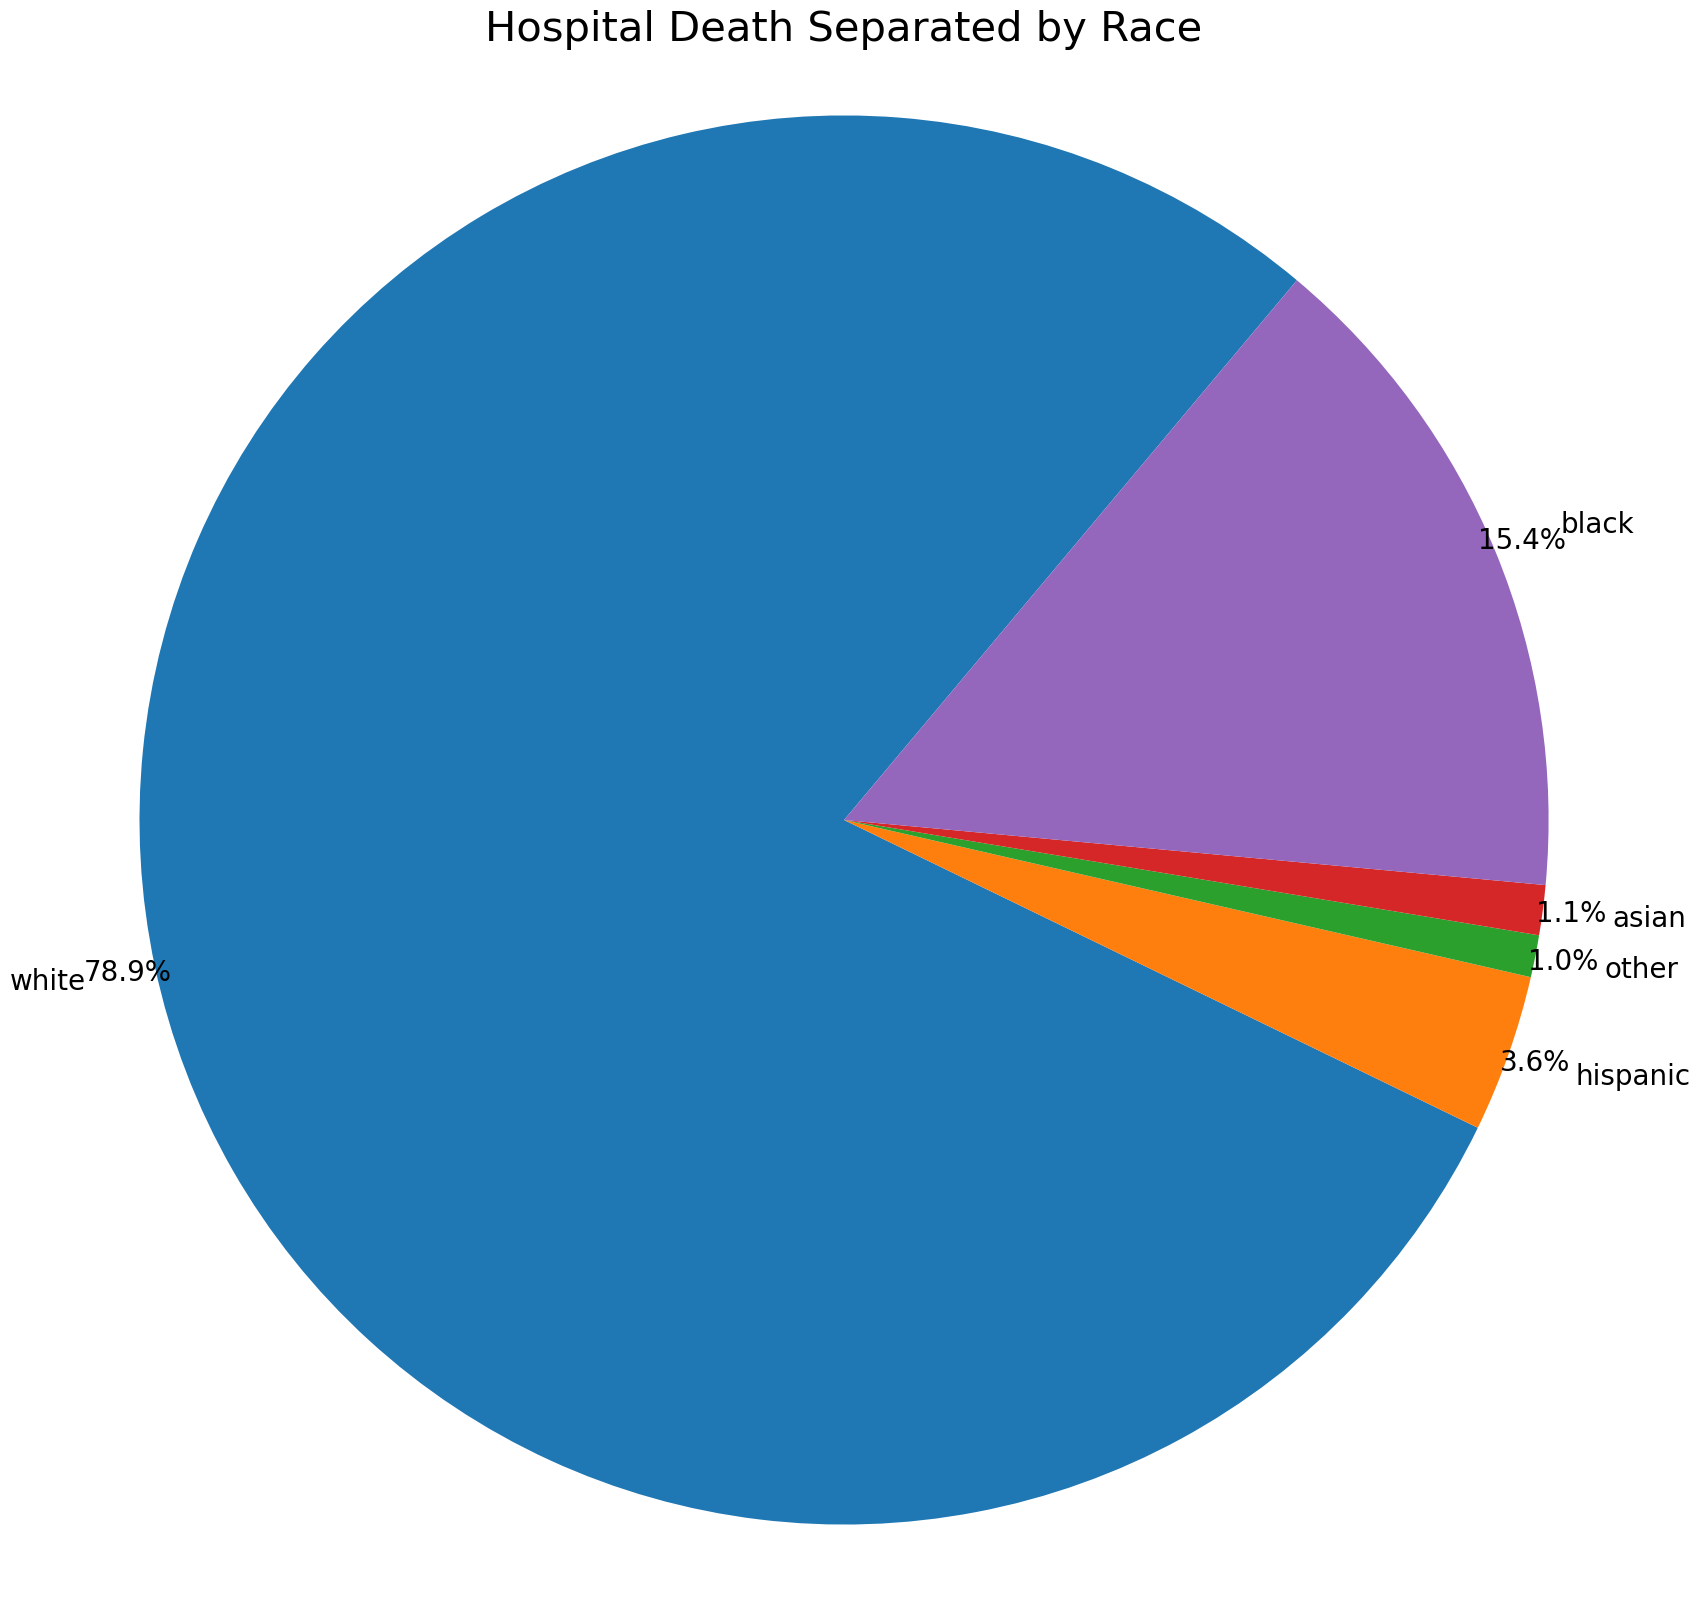

In [34]:
# Pie Chart


plt.figure(figsize=(20, 20))
plt.pie(overall_death.values(), labels=overall_death.keys(), autopct='%1.1f%%', startangle=50, pctdistance=1.04, textprops={'fontsize': 20})
plt.title('Hospital Death Separated by Race', fontsize=30)
plt.axis('equal')
plt.show()

In [35]:
# Diseases of patients recorded by income level
income_df = df.groupby(by=['income'])
income_df = income_df['dzgroup'].value_counts().to_frame().unstack()
income_df.reset_index(inplace=True)
income_df

income             count                                        \
dzgroup             ARF/MOSF w/Sepsis  CHF COPD Cirrhosis Colon Cancer Coma   
0          $11-$25k               502  221  136        68           70   84   
1          $25-$50k               338  112   48        43           67   47   
2             >$50k               183   69   21        37           61   37   
3        under $11k               847  407  364       172           59  137   

                                  
dzgroup Lung Cancer MOSF w/Malig  
0               137          105  
1               130          106  
2                83           66  
3               147          145

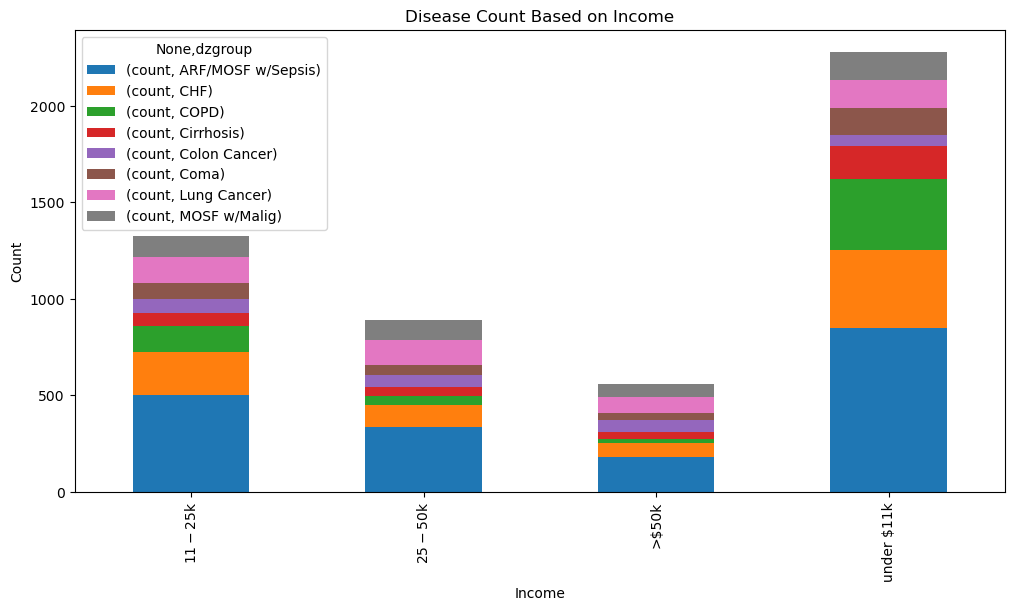

In [36]:
# Stacked Bar Graph for Diseases of patients recorded by income level

income_df.plot(kind='bar', x='income', stacked=True, figsize=(12, 6))
plt.title('Disease Count Based on Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


In [37]:
# Diseases of patients recorded by sex

gender_df = df.groupby(by=['sex'])
gender_disease_df = gender_df['dzgroup'].value_counts().to_frame().unstack()
gender_disease_df.reset_index(inplace=True)


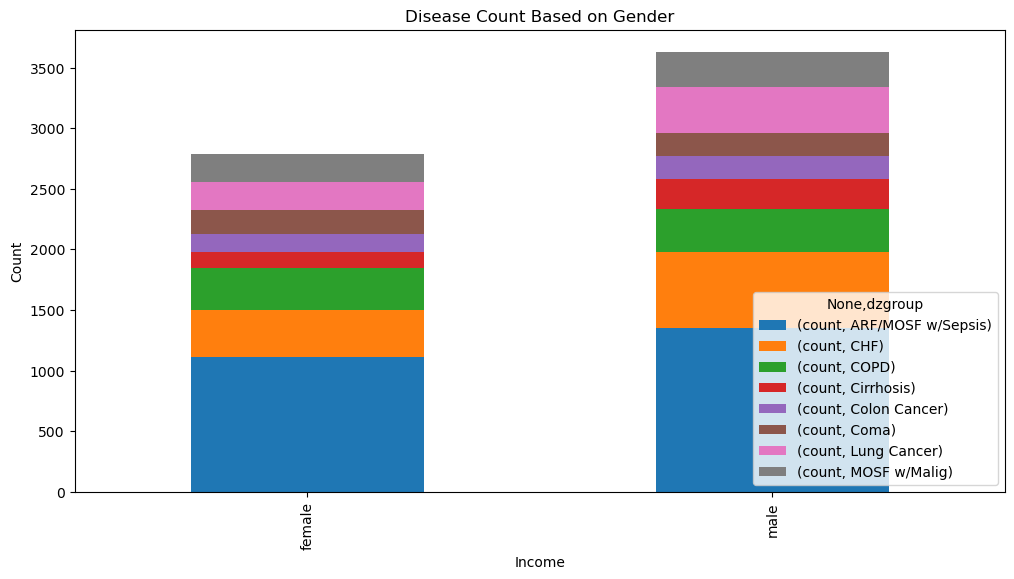

In [38]:
# Stacked bar grpah of diseases of patients recorded by sex

gender_by_disease_df = gender_disease_df.plot(kind='bar', x='sex', stacked=True, figsize=(12, 6))
plt.title('Disease Count Based on Gender')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


In [39]:
df['sex'].value_counts()

sex
male      3631
female    2790
Name: count, dtype: int64

In [40]:
gender_df['hospdead'].sum()

sex
female    732
male      928
Name: hospdead, dtype: int64

In [41]:
df['prg2m'].describe()

count    6421.000000
mean        0.634066
std         0.271932
min         0.000000
25%         0.500000
50%         0.700000
75%         0.800000
max         1.000000
Name: prg2m, dtype: float64

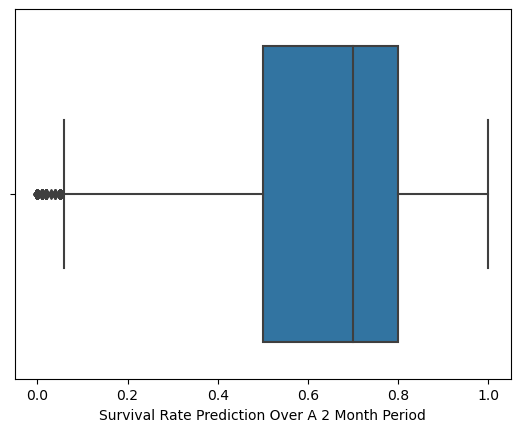

In [42]:
sns.boxplot(data=df, x='prg2m')
plt.xlabel("Survival Rate Prediction Over A 2 Month Period")
plt.show()

In [43]:
df['prg6m'].describe()

count    6421.000000
mean        0.503738
std         0.277960
min         0.000000
25%         0.300000
50%         0.500000
75%         0.700000
max         1.000000
Name: prg6m, dtype: float64

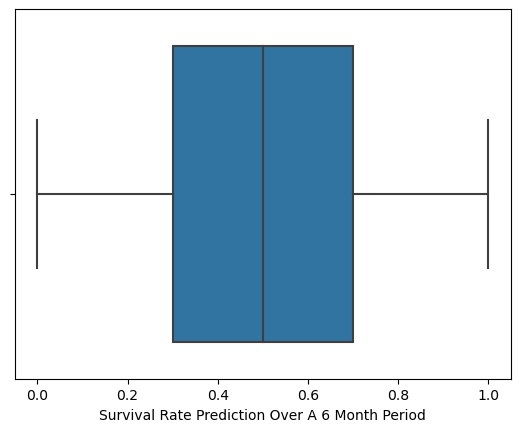

In [44]:
sns.boxplot(data=df, x='prg6m')
plt.xlabel("Survival Rate Prediction Over A 6 Month Period")
plt.show()

In [45]:
df.groupby(by=['dzgroup'])['prg6m'].value_counts()

dzgroup            prg6m
ARF/MOSF w/Sepsis  0.500    614
                   0.800    201
                   0.900    173
                   0.600    170
                   0.700    163
                           ... 
MOSF w/Malig       0.970      1
                   0.550      1
                   0.480      1
                   0.216      1
                   0.125      1
Name: count, Length: 301, dtype: int64

# Splitting 

In [ ]:
y = df['hospdead']
X = df.loc[:, df.columns != 'hospdead']

In [ ]:
y = df['hospdead']
print(y.value_counts())

hospdead
0    6745
1    2360
Name: count, dtype: int64


In [ ]:
random_state = 42

X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_other,y_other,train_size = 0.5, random_state=random_state, stratify=y_other)

print('**balance with stratification:**')
print(np.unique(y_train,return_counts=True))
print(np.unique(y_val,return_counts=True))
print(np.unique(y_test,return_counts=True))


**balance with stratification:**
(array([0, 1]), array([4047, 1416]))
(array([0, 1]), array([1349,  472]))
(array([0, 1]), array([1349,  472]))


In [ ]:
sgss = StratifiedShuffleSplit(n_splits=5, train_size=0.6, random_state=random_state)
sgss.get_n_splits(X, y)

for i, (train_index, test_index) in enumerate(sgss.split(X, y)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[4332 6468 5460 ... 1019 1450 7434]
  Test:  index=[1165 1453 7365 ... 2728 3859 6681]
Fold 1:
  Train: index=[  61  221 2731 ... 6364 2378 4315]
  Test:  index=[8523 5504 3463 ... 5253 6045  260]
Fold 2:
  Train: index=[7235 3843 5804 ... 7554 2532 6627]
  Test:  index=[3061 4926 2375 ... 1868 5482 7291]
Fold 3:
  Train: index=[ 545 7343 2772 ... 8529 6391 6383]
  Test:  index=[1610 8350 5915 ... 4622 4070  762]
Fold 4:
  Train: index=[3878 5749 6795 ...  279 2746 8459]
  Test:  index=[1560 3502  809 ... 2688  288 8505]


# Preprocessing

In [ ]:
df.dtypes.where(lambda x: x == 'object').dropna().index.to_list()

['sex', 'dzgroup', 'dzclass', 'income', 'race', 'ca', 'dnr', 'sfdm2']

In [ ]:
df_objects = df.dtypes.where(lambda x: x == 'object').dropna().index.to_list()
for o in df_objects:
    print(f"{o} unique values: {df[o].unique()}")

sex unique values: ['male' 'female']
dzgroup unique values: ['Lung Cancer' 'Cirrhosis' 'ARF/MOSF w/Sepsis' 'Coma' 'CHF' 'Colon Cancer'
 'COPD' 'MOSF w/Malig']
dzclass unique values: ['Cancer' 'COPD/CHF/Cirrhosis' 'ARF/MOSF' 'Coma']
income unique values: ['$11-$25k' 'under $11k' nan '$25-$50k' '>$50k']
race unique values: ['other' 'white' 'black' 'hispanic' 'asian']
ca unique values: ['metastatic' 'no' 'yes']
dnr unique values: ['no dnr' 'dnr after sadm' 'dnr before sadm']
sfdm2 unique values: [nan '<2 mo. follow-up' 'no(M2 and SIP pres)' 'SIP>=30'
 'adl>=4 (>=5 if sur)' 'Coma or Intub']


In [ ]:
df.drop(columns=['income', 'sfdm2'], inplace=True)

In [ ]:
df.columns

Index(['age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup',
       'dzclass', 'num.co', 'edu', 'scoma', 'charges', 'totcst', 'totmcst',
       'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday', 'diabetes',
       'dementia', 'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday', 'meanbp', 'wblc',
       'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph',
       'glucose', 'bun', 'urine', 'adlp', 'adls', 'adlsc'],
      dtype='object')

In [ ]:
df_objects

['sex', 'dzgroup', 'dzclass', 'income', 'race', 'ca', 'dnr', 'sfdm2']

In [ ]:
enc = OneHotEncoder() 
  
# Passing encoded columns 
encoded_data = enc.fit_transform(df[['sex', 'dzgroup', 'dzclass', 'race', 'ca', 'dnr']])

column_names = enc.get_feature_names_out(['sex', 'dzgroup', 'dzclass', 'race', 'ca', 'dnr'])

enc_data = pd.DataFrame(encoded_data.toarray(), columns=column_names)

 
# Merge with main 
new_df = df.join(enc_data) 
new_df.drop(['sex', 'dzgroup', 'dzclass', 'race', 'ca', 'dnr'], axis=1, inplace=True)
new_df.shape

(9105, 68)